In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv


In [3]:
load_dotenv()

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)

In [4]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    
    return {'outline': outline}

In [6]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    return {'content': content}

In [7]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow=graph.compile()


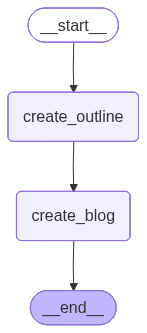

In [8]:
workflow

In [9]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here\'s a detailed outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and informative.\n\n---\n\n## Blog Title Ideas:\n*   The AI Awakening: Charting India\'s Rise in the Age of Artificial Intelligence\n*   India\'s AI Ascent: From Emerging Player to Global Innovator\n*   Beyond the Hype: How AI is Reshaping India\'s Future\n*   The Silicon Valley of AI? India\'s Rapid Strides in Artificial Intelligence\n\n---\n\n## Detailed Blog Outline: The AI Awakening: Charting India\'s Rise in the Age of Artificial Intelligence\n\n### I. Introduction (Approx. 150-200 words)\n\n*   **A. Hook:** Start with a compelling statement about the global impact of AI and its transformative power.\n    *   *Example:* "Artificial Intelligence is no longer a futuristic concept; it\'s a present-day reality reshaping industries, economies, and daily lives across the globe."\n*   **B. India\'s Unique Position:** Briefly introdu

In [10]:
print(final_state['outline'])

Here's a detailed outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and informative.

---

## Blog Title Ideas:
*   The AI Awakening: Charting India's Rise in the Age of Artificial Intelligence
*   India's AI Ascent: From Emerging Player to Global Innovator
*   Beyond the Hype: How AI is Reshaping India's Future
*   The Silicon Valley of AI? India's Rapid Strides in Artificial Intelligence

---

## Detailed Blog Outline: The AI Awakening: Charting India's Rise in the Age of Artificial Intelligence

### I. Introduction (Approx. 150-200 words)

*   **A. Hook:** Start with a compelling statement about the global impact of AI and its transformative power.
    *   *Example:* "Artificial Intelligence is no longer a futuristic concept; it's a present-day reality reshaping industries, economies, and daily lives across the globe."
*   **B. India's Unique Position:** Briefly introduce India as a significant player in the global tech landscape, now rapi

In [11]:
print(final_state['content'])

## The AI Awakening: Charting India's Rise in the Age of Artificial Intelligence

Artificial Intelligence is no longer a futuristic concept confined to sci-fi novels; it's a present-day reality reshaping industries, economies, and daily lives across the globe. From powering personalized recommendations to driving medical breakthroughs, AI's transformative power is undeniable. In this global technological shift, India is rapidly emerging as a significant player. With its vast talent pool, robust digital infrastructure, and a burgeoning startup ecosystem, the nation is not just adopting AI but actively shaping its future. This blog delves into the multifaceted rise of AI in India, examining the forces propelling its growth, the sectors it's revolutionizing, the hurdles it faces, and its promising trajectory towards becoming a global AI powerhouse.

### The Foundation: Why India is Ripe for AI Growth

India's journey into the AI era is built upon several strong foundational pillars. First